In [13]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import tdt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import xarray as xr

import kdephys.hypno.hypno as kh
import kdephys.pd as kpd
import kdephys.xr as kx
import kdephys.utils as ku
from kdephys.plot.main import *
import acr
import plotly.express as px
import acr.info_pipeline as aip
import os

In [3]:
subject = 'ACR_13'
recording = 'sdpi-bl'
chunks = ['chunk2', 'chunk2MD']

In [5]:
kh.load_hypno_file?

Signature: kh.load_hypno_file(path, st, dt=True)
Docstring: Load a Visbrain formatted hypnogram.
File:      ~/github_t2/kdephys/kdephys/hypno/hypno.py
Type:      function


In [8]:
hd = {}
for chunk in chunks:
    path = f'/Volumes/opto_loc/Data/ACR_PROJECT_MATERIALS/{subject}/hypnograms/hypno_{recording}_{chunk}.txt'
    hd[chunk] = kh.load_hypno_file(path, st=None, dt=False)

In [11]:
hd['chunk2']

,state,end_time,start_time,duration
0,NREM,51.090000,0.000000,51.090000
1,Wake,55.090000,51.090000,4.000000
2,NREM,146.789993,55.090000,91.699993
3,Unsure,146.889999,146.789993,0.100006
4,Transition-to-REM,155.789993,146.889999,8.899994
...,...,...,...,...
92,Wake,6851.689941,6840.390137,11.299805
93,Transition-to-NREM,6860.790039,6851.689941,9.100098
94,NREM,7077.390137,6860.790039,216.600098
95,Wake,7095.790039,7077.390137,18.399902


In [ ]:
hypno_dict[h_name].start_time.min()
hypno_dict[h_name].start_time.min()

In [14]:
def hypno_comparitor(hypno_dict):
    for h_name in hypno_dict.keys():
        fo = hypno_dict[h_name].fractional_occupancy()
        print(fo)
        x = np.arange(0, 7200, 100)
        f, ax = plt.subplots(figsize=(30, 10))
        ax.plot(x, np.ones_like(x), color='k', alpha=0.5)
        shade_hypno_for_me(hypno_dict[h_name], ax=ax)
    return

state
Brief-Arousal         0.000819
NREM                  0.421220
REM                   0.075792
Transition-to-NREM    0.006319
Transition-to-REM     0.011889
Unsure                0.000042
Wake                  0.483919
Name: duration, dtype: float64
state
Brief-Arousal         0.001111
NREM                  0.435139
REM                   0.076667
Transition-to-NREM    0.021667
Transition-to-REM     0.009444
Transition-to-Wake    0.007222
Unsure                0.001388
Wake                  0.447362
Name: duration, dtype: float64


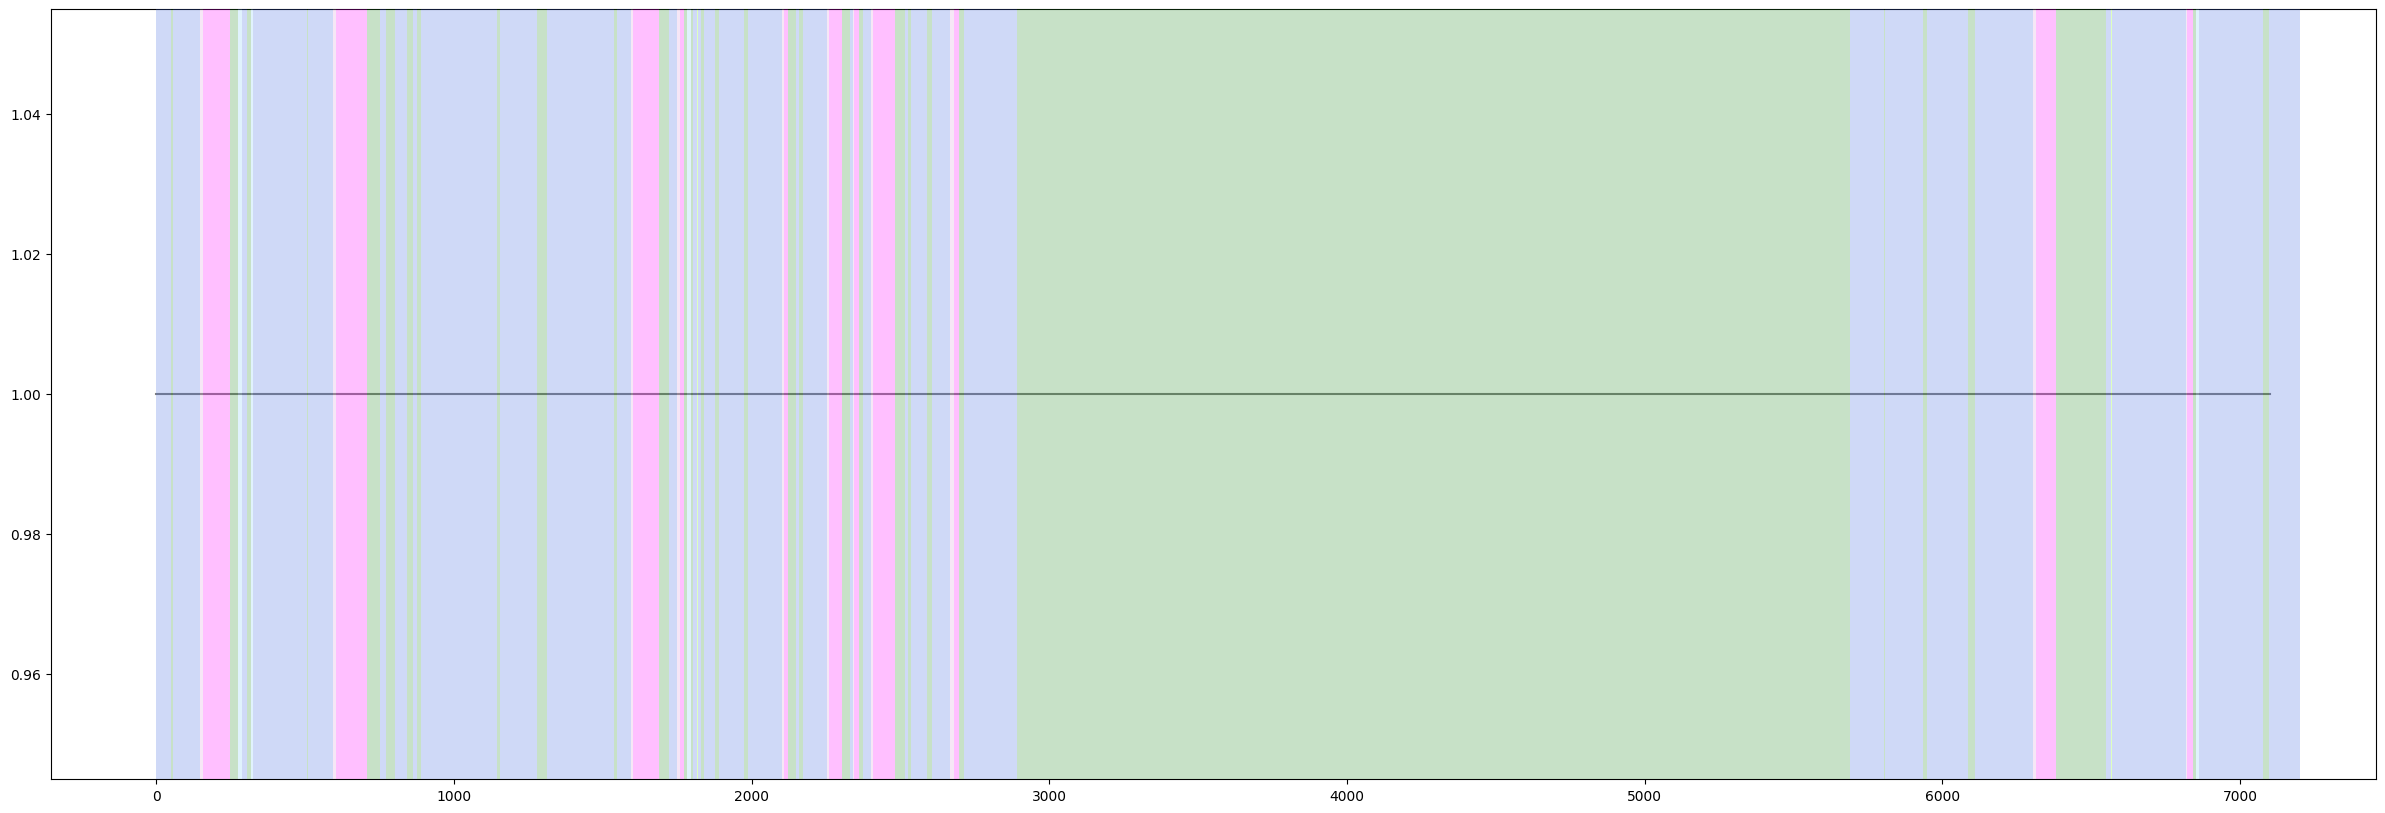

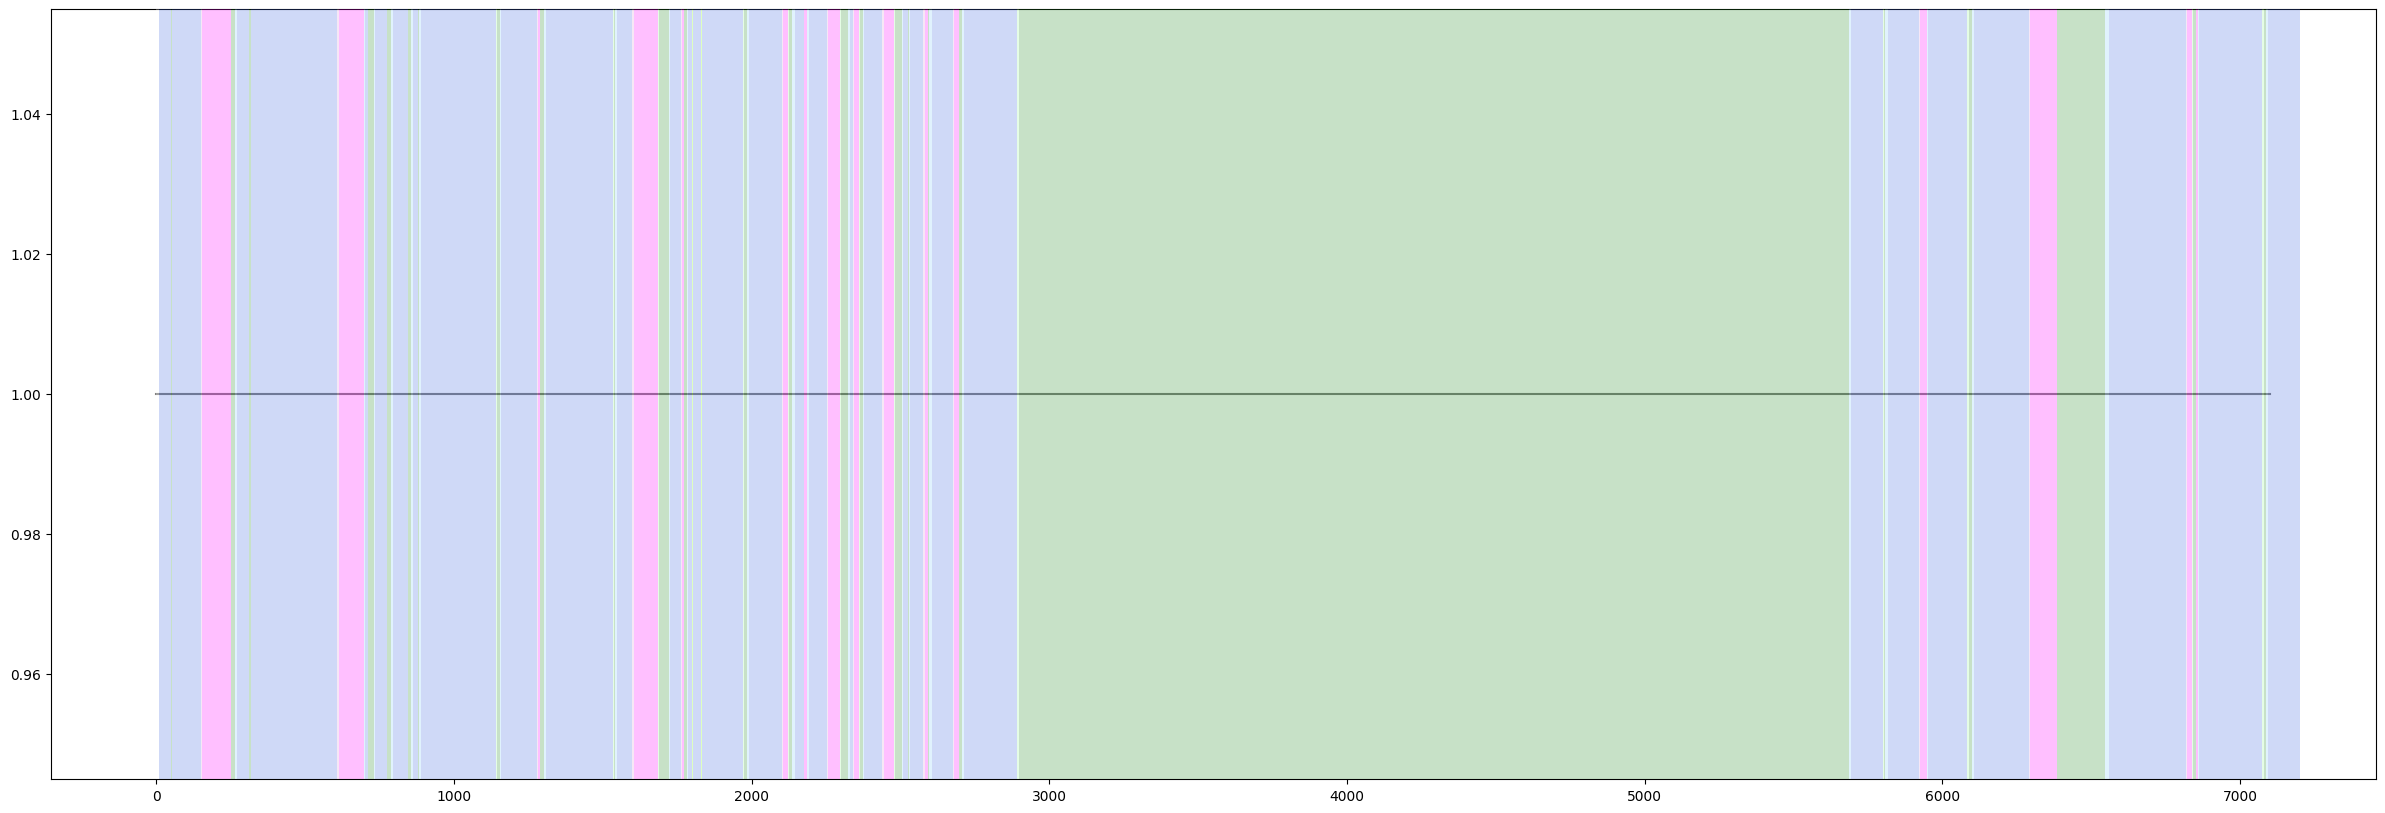

In [15]:
hypno_comparitor(hd)